Back to the main [Index](../index.ipynb)

# Stochastic simulation

Stochastic simulations can be run by changing the current integrator type to 'gillespie' or by using the `r.gillespie` function.

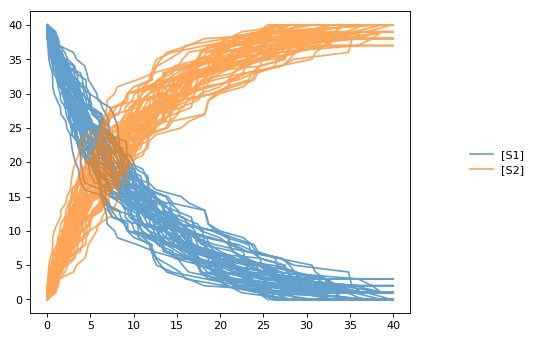

In [8]:
from __future__ import print_function
import tellurium as te
te.setDefaultPlottingEngine('matplotlib')
%matplotlib inline
import numpy as np

r = te.loada('S1 -> S2; k1*S1; k1 = 0.1; S1 = 40')
r.integrator = 'gillespie'
r.integrator.seed = 1234

results = []
for k in range(1, 50):
    r.reset()
    s = r.simulate(0, 40)
    results.append(s)
    r.plot(s, show=False, alpha=0.7)
te.show()

#### Seed

Setting the identical seed for all repeats results in identical traces in each simulation.

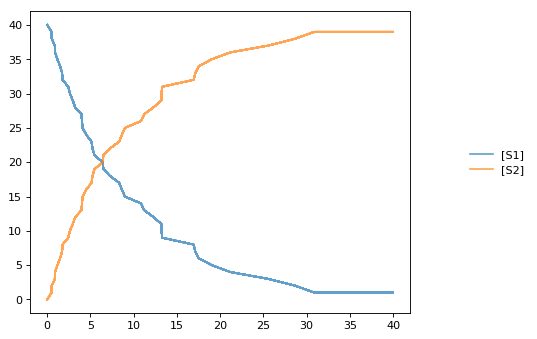

In [5]:
results = []
for k in range(1, 20):
    r.reset()
    r.setSeed(123456)
    s = r.simulate(0, 40)
    results.append(s)
    r.plot(s, show=False, loc=None, color='black', alpha=0.7)
te.show()

#### Combining Simulations

You can combine two timecourse simulations and change e.g. parameter values in between each simulation. The `gillespie` method simulates up to the given end time `10`, after which you can make arbitrary changes to the model, then simulate again.

When using the `te.plot` function, you can pass the parameter `names`, which controls the names that will be used in the figure legend, and `tags`, which ensures that traces with the same tag will be drawn with the same color.

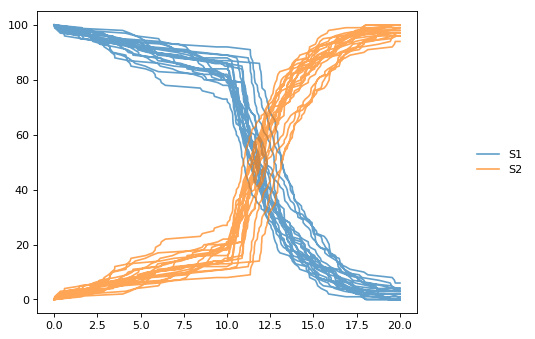

In [6]:
import tellurium as te
import numpy as np

r = te.loada('S1 -> S2; k1*S1; k1 = 0.02; S1 = 100')
r.setSeed(1234)
for k in range(1, 20):
    r.resetToOrigin()
    res1 = r.gillespie(0, 10)
    # change in parameter after the first half of the simulation
    r.k1 = r.k1*20
    res2 = r.gillespie (10, 20)
    sim = np.vstack([res1, res2])
    te.plot(sim[:,0], sim[:,1:], alpha=0.7, names=['S1', 'S2'], tags=['S1', 'S2'], show=False)
te.show()